In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC

# Load File

In [21]:
# Open file.
DATASET_FOLDER = '../datasets/'
FILE_NAME = 'AIRS.2002.08.01.L3.RetStd_H031.v4.0.21.0.G06104133732.hdf'
hdf = SD(DATASET_FOLDER + FILE_NAME, SDC.READ)

# Explore Data

In [22]:
# List available SDS datasets.
print(hdf.datasets())

{'TotalCounts_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 0), 'TotCldLiqH2O_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 1), 'TotCldLiqH2O_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 2), 'TotCldLiqH2O_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 3), 'TotH2OVap_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 4), 'TotH2OVap_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 5), 'TotH2OVap_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 6), 'TotO3_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 7), 'TotO3_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 8), 'TotO3_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 9), 'SurfAirTemp_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 10), 'SurfAirTemp_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 11), 'SurfAirTemp_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 12), 'Surf

In [24]:
# Read dataset.
DATAFIELD_NAME='RelHumid_A'
data3D = hdf.select(DATAFIELD_NAME)
data = data3D[11,:,:]
data

array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [ 3.9453125e-01, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [ 3.8671875e-01, -9.9990000e+03,  3.6718750e-01, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       ...,
       [-9.9990000e+03, -9.9990000e+03,  1.4500000e+02, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]], dtype=float32)

In [25]:
# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

# Handle fill value
very important!!!

In [26]:
attrs = data3D.attributes(full=1)
fillvalue=attrs["_FillValue"]

# fillvalue[0] is the attribute value.
fv = fillvalue[0]
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

# Plot Data

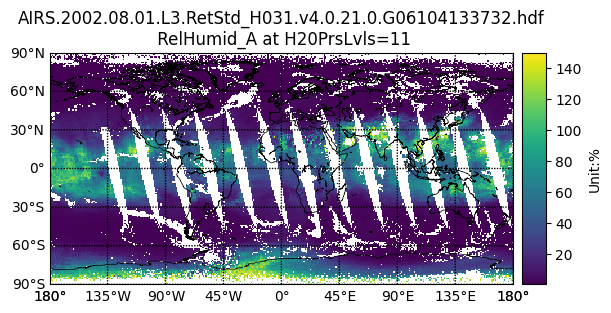

In [15]:
# Draw an equidistant cylindrical projection using the low resolution
# coastline database.
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data)
cb = m.colorbar()
cb.set_label('Unit:%')

plt.title('{0}\n {1} at H20PrsLvls=11'.format(FILE_NAME, DATAFIELD_NAME))
fig = plt.gcf()
# Show the plot window.
# plt.show()

In [20]:
# Save plot.
pngfile = f"../assets/plots/{FILE_NAME}.py.png"
fig.savefig(pngfile)